<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Убераем-редкие-и-выбивающиеся-значения." data-toc-modified-id="Убераем-редкие-и-выбивающиеся-значения.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Убераем редкие и выбивающиеся значения.</a></span></li><li><span><a href="#Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-Построение-гистограмм-для-каждого-параметра" data-toc-modified-id="Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-Построение-гистограмм-для-каждого-параметра-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм для каждого параметра</a></span></li><li><span><a href="#•----Изучение-времени-продажи-квартиры." data-toc-modified-id="•----Изучение-времени-продажи-квартиры.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>•    Изучение времени продажи квартиры.</a></span></li><li><span><a href="#Изучение-цены-квартиры-от-различных-факторов" data-toc-modified-id="Изучение-цены-квартиры-от-различных-факторов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение цены квартиры от различных факторов</a></span></li><li><span><a href="#Анализ-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-10-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ 10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Изучение-предложения-квартир-в-зависимости-от-расстояния-до-центра" data-toc-modified-id="Изучение-предложения-квартир-в-зависимости-от-расстояния-до-центра-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучение предложения квартир в зависимости от расстояния до центра</a></span></li><li><span><a href="#Анализ-сегмента-квартир-в-центре" data-toc-modified-id="Анализ-сегмента-квартир-в-центре-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ сегмента квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#загружаем данные из файла, осматриваемся
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv ('/datasets/real_estate_data.csv',  sep='\t')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
df.describe() #смотрим характеристику датафрейма

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
df.sample(15) #смотрим 15 случайных строк нашего датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11783,15,5993000.0,73.50,2018-07-25T00:00:00,4,2.50,9.0,48.50,4,NaN,...,6.30,1.0,Санкт-Петербург,45881.0,13532.0,1.0,319.0,1.0,1019.0,12.0
10328,9,4100000.0,44.00,2017-06-01T00:00:00,2,2.50,5.0,27.00,2,False,...,7.00,1.0,Санкт-Петербург,46019.0,18743.0,0.0,NaN,0.0,NaN,250.0
20937,18,6400000.0,55.90,2017-04-27T00:00:00,1,NaN,17.0,29.20,11,NaN,...,9.30,0.0,Санкт-Петербург,32866.0,13783.0,0.0,NaN,1.0,836.0,60.0
5739,12,4800000.0,40.00,2017-07-10T00:00:00,1,3.00,16.0,18.00,10,NaN,...,11.00,NaN,Санкт-Петербург,35039.0,11296.0,0.0,NaN,0.0,NaN,197.0
14724,10,4626540.0,41.16,2018-10-14T00:00:00,1,NaN,13.0,NaN,1,NaN,...,9.91,NaN,Санкт-Петербург,43398.0,12158.0,0.0,NaN,0.0,NaN,198.0
14417,9,1950000.0,34.00,2017-01-23T00:00:00,1,NaN,4.0,14.00,2,False,...,10.00,0.0,посёлок Щеглово,NaN,NaN,NaN,NaN,NaN,NaN,123.0
2275,6,9495000.0,69.00,2017-09-02T00:00:00,2,2.65,23.0,47.00,14,NaN,...,10.00,2.0,Санкт-Петербург,31233.0,7372.0,1.0,293.0,3.0,206.0,184.0
1452,8,2650000.0,34.50,2017-12-14T00:00:00,1,NaN,19.0,17.30,17,NaN,...,8.50,NaN,Санкт-Петербург,42681.0,21997.0,0.0,NaN,1.0,682.0,40.0
18073,4,3650000.0,39.00,2017-05-09T00:00:00,1,2.65,14.0,20.00,9,False,...,7.80,1.0,Санкт-Петербург,33877.0,14921.0,0.0,NaN,2.0,124.0,36.0
9923,10,4800000.0,55.64,2017-10-17T00:00:00,2,NaN,22.0,30.82,10,NaN,...,11.74,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,193.0


In [4]:
#df.query('locality_name == Санкт-Петербург').head()
df.loc[df['locality_name'] == "Зеленогорск"]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
302,6,3500000.0,31.0,2016-04-05T00:00:00,1,2.55,5.0,17.5,1,NaN,...,5.4,0.0,Зеленогорск,72005.0,53104.0,3.0,92.0,1.0,571.0,168.0
376,18,8400000.0,84.0,2018-06-26T00:00:00,2,2.75,3.0,41.0,1,NaN,...,13.0,NaN,Зеленогорск,73827.0,54926.0,0.0,NaN,0.0,NaN,201.0
939,17,3015000.0,31.2,2019-04-16T00:00:00,1,2.50,3.0,17.5,1,NaN,...,5.8,NaN,Зеленогорск,75646.0,56745.0,0.0,NaN,1.0,347.0,NaN
2036,19,6100000.0,50.0,2018-03-24T00:00:00,2,2.60,5.0,29.0,5,NaN,...,9.0,1.0,Зеленогорск,71618.0,52717.0,3.0,37.0,1.0,926.0,72.0
2974,13,3200000.0,46.3,2018-03-31T00:00:00,2,2.50,3.0,29.2,2,NaN,...,7.0,1.0,Зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0
3477,4,6400000.0,67.2,2016-10-10T00:00:00,3,NaN,6.0,43.0,1,NaN,...,12.0,0.0,Зеленогорск,71597.0,52696.0,3.0,112.0,1.0,408.0,316.0
3936,10,4250000.0,38.0,2017-11-30T00:00:00,1,2.70,3.0,20.0,3,NaN,...,8.0,NaN,Зеленогорск,72078.0,53177.0,3.0,533.0,2.0,123.0,179.0
4441,6,2300000.0,31.0,2016-05-26T00:00:00,1,NaN,3.0,12.0,1,NaN,...,9.0,0.0,Зеленогорск,78527.0,59626.0,0.0,NaN,0.0,NaN,232.0
4906,11,5500000.0,49.0,2017-10-24T00:00:00,2,2.50,5.0,29.0,3,NaN,...,8.5,1.0,Зеленогорск,71529.0,52628.0,3.0,296.0,2.0,521.0,25.0
6247,8,9600000.0,180.1,2017-03-07T00:00:00,4,2.75,2.0,100.0,2,NaN,...,19.5,1.0,Зеленогорск,73547.0,54646.0,0.0,NaN,1.0,1037.0,496.0


In [5]:
df.duplicated().sum()#проверка на явные дубликатыва

0

### Вывод

Получили таблицу с данными и провели анализ качества данных. Видим что таблица состоит из 22 колонок с различным качеством данных, в некоторых столбцах имеются пропуски данных. В начальном виде таблица  не содержит явных дубликата.

Все столбцы, кроме `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `studio`, `open_plan` имеют пропуски в данных.

Сделаем предположения, что квартиры с одинаковым количеством комнат и общим размером площади, а так же жилой площади имеют схожие основные параметры, т.е. типовую застройку и проекты. Заполним пропуски значений в критичных для исследования столбцах `living_area`, `ceiling_height`, `kitchen_area` путем замены **NaN** на медианные значения, рассчитанные на основании сгруппированных данных о количестве комнат в квартире и общей площади.                                     

Заполним пропуски в данных о количестве балконов на **0**, в соответсвии с условиями задачи логично предположить, что  если человек не указал число балконов — скорее всего, их нет.
Из этой же логики заполняем пропуски в столбце `is_apartment`, во всех пропусках данных в этом столбце, где не указан признак **True**, соответсвенно должны стоять **False**

Логическая замена пропусков для столбцов `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` отсутствует, т.к. не для всех населенных пунктов имеются данные об удаленности, и нет данных  для их вычисления. Замена пропусков на 0 исказит общую картину в датафрейме. 

Так же логично, что для всех квартир, в столбце `studio` которых указан признак True, площадь `kitchen_area` будет равняться 0. Учтем этот факт при замене пропусков в датафрейме.

Данные о первоначальной дате размещения объявлений, содержащиеся в столбце `first_day_exposition`, находятся в формате *object*, т.е. в формате строки. Переведем данные в более подходящий формат *datetime64*.

Видим, что столбцы `last_price` , `total_area`, `floors_total`, имеют тип значения *float*, но при этом значения числовые значения содержат только нули после запятой. В таком случае более логичным видится присвоение типа данных *int*.
В тоже время, столбцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`  так же имеют тип данных *float*, однако имеющиеся пропуски в данных не позволяют произвести замену типов данных.

Приступим к переработки данных.

## Предобработка данных

In [6]:
#Замена пропусков в данных на медианные значения, рассчитанные на основании сгруппированных
#данных о количестве комнат в квартире и общей площади
trans = df.groupby(['rooms', 'total_area'])['living_area'].transform('median') 
df['living_area'] = df['living_area'].fillna(trans)

trans= df.groupby(['rooms', 'kitchen_area'])['living_area'].transform('median') 
df['living_area'] = df['living_area'].fillna(trans)

trans = df.groupby(['rooms', 'total_area'])['ceiling_height'].transform('median') 
df['ceiling_height'] = df['ceiling_height'].fillna(trans)

trans = df.groupby(['rooms', 'living_area'])['ceiling_height'].transform('median') 
df['ceiling_height'] = df['ceiling_height'].fillna(trans)

trans = df.groupby(['rooms', 'total_area'])['kitchen_area'].transform('median') 
df['kitchen_area'] = df['kitchen_area'].fillna(trans)

trans = df.groupby(['rooms', 'ceiling_height'])['kitchen_area'].transform('median') 
df['kitchen_area'] = df['kitchen_area'].fillna(trans)

# Обработка пропусков в столбцах balcony, is_apartment и studio исзодя из логики датафрема
df['balcony'] = df['balcony'].fillna(0)
df.loc[df['studio'] == True, 'kitchen_area'] = df.loc[df['studio'] == True, 'kitchen_area'].fillna(0) #Кухни!
df['is_apartment'] = df['is_apartment'].fillna(False) #Аппартаменты!

# удаление строк, для которых не удалось найти замену пропусков в данных
df = df.dropna(subset=['living_area','kitchen_area', 'floors_total', 'ceiling_height']) 

#перевод столбца first_day_exposition к типу данных datetime64
df ['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')

#привод данных столбцов к целочисленным значениям
df[['last_price','floors_total','floor','balcony']]= df[['last_price','floors_total','floor','balcony']].astype('int64', errors='ignore')

In [7]:
df.info() #проверка результата

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23065 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23065 non-null  int64         
 1   last_price            23065 non-null  int64         
 2   total_area            23065 non-null  float64       
 3   first_day_exposition  23065 non-null  datetime64[ns]
 4   rooms                 23065 non-null  int64         
 5   ceiling_height        23065 non-null  float64       
 6   floors_total          23065 non-null  int64         
 7   living_area           23065 non-null  float64       
 8   floor                 23065 non-null  int64         
 9   is_apartment          23065 non-null  bool          
 10  studio                23065 non-null  bool          
 11  open_plan             23065 non-null  bool          
 12  kitchen_area          23065 non-null  float64       
 13  balcony         

**Вывод:**
В результате переработки данных из датафрейма было исключено **634** строки или **2,6%** от общего количества, что является приемлемым результатом. Незначительно снижен объем используемой памяти. Все пропуски данных, которые можно было заполнить исходя из логики - заполненны =)

## Расчёты и добавление результатов в таблицу

In [9]:
df['price_per_metr'] = df['last_price']/ df['total_area'] # создание столбца с значением цены за квадратный метр 

# Cоздание столбцов с значениями дня недели размещения объявления, месяца и года
df['placement_day'] = df['first_day_exposition'].dt.weekday 
df['placement_month'] = df['first_day_exposition'].dt.month 
df['placement_year'] = df['first_day_exposition'].dt.year   

# Написание функции, возвращающей в столбец значение "первый", "последний", "другой" в зависимости от этажа размещения квартиры
# и количества этажей в доме
def floors_grouped (row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'Первый'
    if floors_total == floor:
        return 'Последний'
    return 'Другой'
df['floor_guide'] = df.apply(floors_grouped, axis=1)

# создание столцов с данными о доли жилой площади в общей площади квартиры, а так же доли кухни
df['living_ratio'] = df['living_area']/df['total_area']
df['kitchen_area_ratio'] = df ['kitchen_area'] / df['total_area'] 

#df.head(5) #проверяем результат

**Вывод:** Все задачи, которые были поставлены на этапе добавления расчетов и результатов в таблицу, выполнены. Теперь можно легко сориентироваться, в какой день недели было размещено объявление, на каком этаже расположена данная квартира, какова цена квадратного метра и какое соотношение жилой и площади кухни к общей. Приступаем к анализу датафрейма.
    

## Исследовательский анализ данных

###  Убераем редкие и выбивающиеся значения.

In [10]:
# Для начала убедимся, что замена пропусков не сильно исказила датафрейм, все медианные значения и квантили в критичных для нас 
# столбцах находятся на своих местах
df.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,placement_day,placement_month,placement_year,living_ratio,kitchen_area_ratio
count,23065.000000,2.306500e+04,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,...,7861.000000,17713.000000,8800.000000,19948.000000,2.306500e+04,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000
mean,9.914459,6.295892e+06,59.393020,2.059571,2.731548,10.627661,33.989590,5.856406,10.337044,0.595664,...,490.006233,0.761700,519.645455,181.012733,9.870221e+04,2.563191,6.384739,2017.370388,0.564225,0.186500
std,5.668914,8.614182e+06,32.453463,1.033898,1.012158,6.574166,20.549348,4.857626,5.639578,0.962197,...,340.162952,0.934482,277.690025,219.162058,4.693176e+04,1.789598,3.491913,1.039432,0.103554,0.073483
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.000000
25%,6.000000,3.420000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,295.000000,45.000000,7.647059e+04,1.000000,3.000000,2017.000000,0.495726,0.133453
50%,10.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,503.500000,96.000000,9.485714e+04,3.000000,6.000000,2017.000000,0.567568,0.171875
75%,14.000000,6.700000e+06,69.000000,3.000000,2.760000,16.000000,42.000000,8.000000,11.750000,1.000000,...,612.000000,1.000000,731.250000,232.000000,1.139535e+05,4.000000,10.000000,2018.000000,0.636364,0.231944
max,50.000000,4.200000e+08,900.000000,16.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,0.983447,0.942308


Прекрасно, все значения на своих местах. 

Однако в глаза бросается сильный разброс значений между третьей квантилью (75% в функции discribe) и максимальными значениями в столбцах  `last_price`,	`total_area`,	`rooms`,	`ceiling_height`,	`floors_total`, `living_area`,	`floor`,	`kitchen_area`. Можно сделать вывод, что в данных столбцах присутствуют "выбросы" в значениях данных. Для их определения отразим значения столбцов на диаграммах размаха и проанализируем их визуализацию.

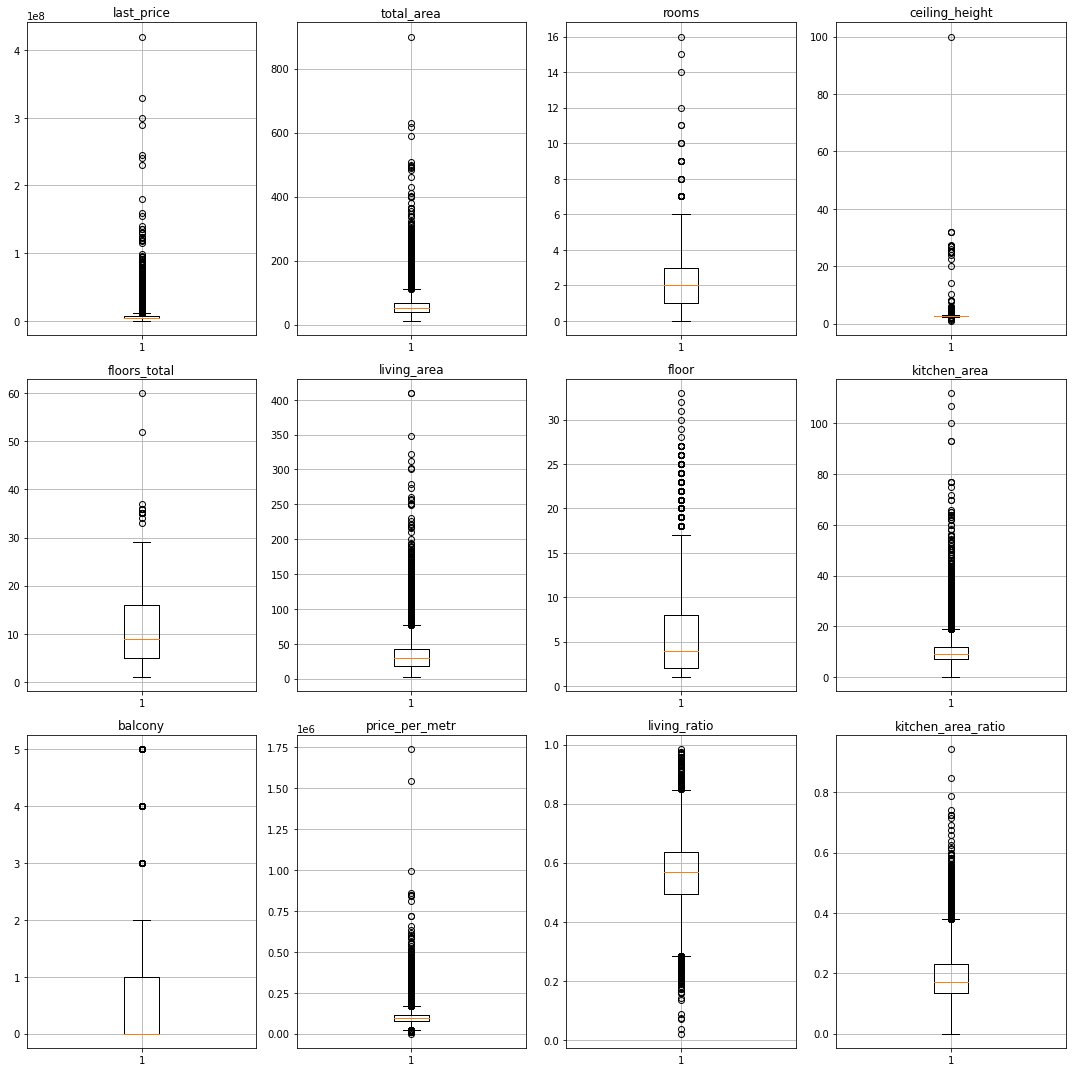

In [11]:
# Рисуем ящики с усами к интерисующим нас столцам
boxplot_columns = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area',
                    'floor','kitchen_area', 'balcony', 'price_per_metr', 'living_ratio','kitchen_area_ratio']

fig, axs = plt.subplots(3, 4, figsize=(15,15))
axs = axs.ravel()

for idx,ax in enumerate(axs):
    
    ax.boxplot(df[boxplot_columns].iloc[:,idx])
    ax.set_title(df[boxplot_columns].columns[idx])
    ax.grid()
    
plt.tight_layout()

In [12]:
#Проверка гипотизы о полном исключении выбросов данных для анализа
#df = df[df['last_price'] > 1000000 ]
#df = df[df['last_price'] <50000000]
#df = df[df['total_area'] < 150]
#df = df[df['rooms'] < 6]
#df = df[df['ceiling_height'] > 2.30]
#df = df[df['ceiling_height'] < 3.5]
#df = df[df['living_area'] < 85]
#df = df[df['kitchen_area'] < 20]
#print (df.shape)

In [13]:
#Фильтруем датафрейм согласно построенных ранее диаграмм размаха
df = df[df['last_price'] > 1000000]
df = df[df['last_price'] <50000000]
df = df[df['total_area'] < 400]
df = df[df['rooms'] < 8]
df = df[df['ceiling_height'] > 2.3]
df = df[df['ceiling_height'] < 5]
df = df[df['living_area'] < 150]
df = df[df['kitchen_area'] < 75]

#print (df.shape) # Всего в результате фильтрации убрано 1136 строка из первоначального датасета, что состовляет 4,7%. 

**Вывод:** Как и ожидалось, графики показали нам большое количество выбросов значений в каждом столбце. 
Особенно примечательно количество выбросов и их разброс в столбцах `last_price`, `total_area`, `ceiling_height`, `living_area`, `kitchen_area`, чьи значения находятся выше  краев статистически значимой выборки в несколько раз. Кроме того, некоторые данные не укладываются в логически объяснимые допустимые значения, например высота потолков в одном из объявлений 100 метров.

Для анализа статистически значимой выборки необходимо отфильтровать наши данные, убрав из нее наиболее сильные выбросы.
В ходе анализа я отказался от идеи полного исключения выбросов из датафрейма, т.к. подобная фильтрация данных не позволит нам в полной мере проанализировать рынок недвижимости: одновременно в нем могут продаваться одинаковые по планировки квартиры, но с разной ценой ввиду разного ремонта или местоположения, или обратная ситуация - цена квартир одинаковая, а планировка, размер общей и жилой площади будет сильно отличататься. 
И второй момент в полном полном исключении выбросов из датафрейма - слишком большое количество данных находятся вне статистически значимой выборки. Если мы полностью исключим выбросы, то получим датафрейм практически без 2608 строк, что составляет солидные 11% от первоначальных данных

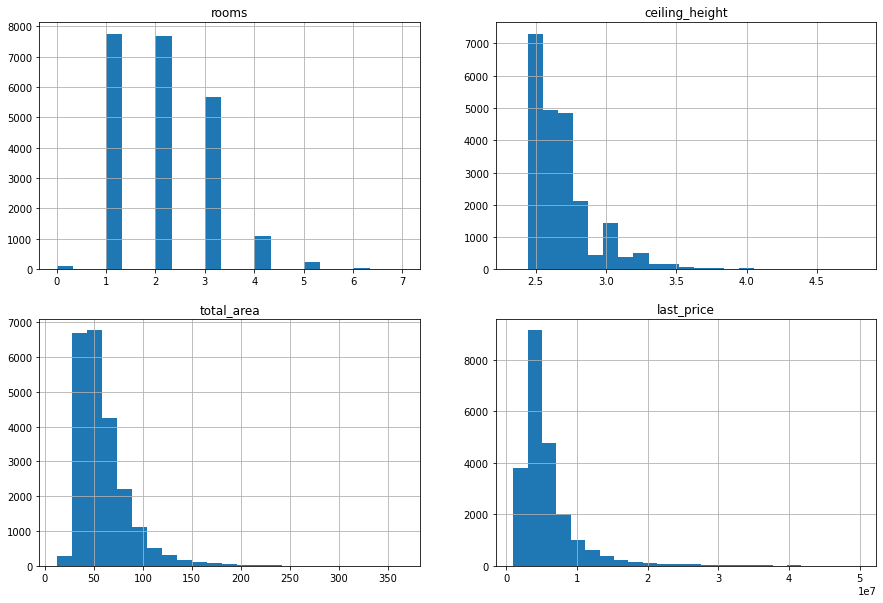

In [14]:
#отрисовываем графики
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs = axs.ravel()
hist_list = ['rooms','ceiling_height', 'total_area', 'last_price']
for idx,ax in enumerate(axs):
    ax.hist(df[hist_list].iloc[:,idx], bins = 'doane')
    ax.grid()
    ax.set_title(df[hist_list].columns[idx])

**Вывод:** Самые популярные предложения на рынке — однокомнатные и двухкомнатные квартиры — более 15 тысяч предложений на двоих! Объявлений  продаже однокомнатных квартир чуть больше, примерно 7,7 тысячи объявлений, двухкомнатных чуть меньше, примерно 7,6 тысячи объявлений. На объявления о продаже трехкомнатных квартир приходится  примерно 5,6 тысячи объявлений. На объявления о продаже студий, четырёх, пяти, шести, семи комнатных квартир приходится сильно меньше - в совокупности около 1,5 тысячи объявлений.  

Самая популярная высота потолков в объявлениях - 2,5 метра - около 7,2 тысяч объявлений. Так же, на момент формирования датасета, было выставлено около 5 тысяч квартир со средней высотой потолков 2,6 метра, чуть меньше - около  4,8 тысяч объявлений - со средней высотой потолков 2,7 метра. Далее по полярности идет высота потолков 2,7 метра - чуть больше 2,1 тысяч объявлений, и 3,0 метра - около 1,5 тысяч объявлений. Что удивительно, график имеет "провал" в области высоты потолков 2,9 метров. Видимо данная высота не является типовой, поэтому объявлений о продаже квартир с подобной высотой потолков даже меньше чем с высотой потолка 3,2 метра - примерно 0,4 тысячи объявлений.

График распределения общей площади квартир более типовой. Примерно 3,8 тысячи квартир имеет площадь от 30 до 40 квадратных метров, 6,2 тысячи квартир имеет площадь от 40 до 50 квадратных метров и является самым распространенным метражом в объявлениях. Это закономерно, под данную площадь могут попадать как однокомнатные (например в новостройках) так и двухкомнатные квартиры. Третий по распространенности метраж — от 50 до 60 квадратных метров — около 4,5 тысячи объявлений. 

Абсолютное большинство объявлений о продаже квартир имеет стоимости до 10 млн. рублей. При этом самое распестрённая цена в объявлениях — от 2,5 до 5 млн. рублей за квартиру — таких объявлений набралось около 9,4 тысячи штук. Далее по распространенности идут объявления о продаже квартир за 5-7,5 млн рублей — чуть меньше 5 тысяч объявлений. На третьем месте идут объявления о продаже квартир в интервале 1 - 2,5 млн. рублей — примерно 3,8 тысячи объявлений.

### •	Изучение времени продажи квартиры.

Медианное значение времени продажи квартиры равно 96 дней
Среднее значение времени продажи квартиры равно 180 дней


count    19589.000000
mean       180.329930
std        218.576848
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

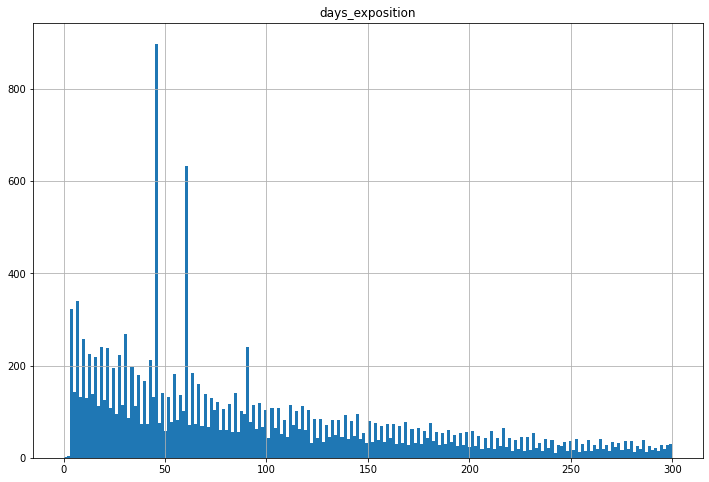

In [15]:
df.hist ('days_exposition', bins = 200, figsize = (12, 8), range=(0,300)) #строим гистограмму 
print (f'Медианное значение времени продажи квартиры равно {df["days_exposition"].median():.0f} дней') #выводим значение медианы
print (F'Среднее значение времени продажи квартиры равно {df["days_exposition"].mean():.0f} дней') #выводим среднее значение
df['days_exposition'].describe() #смотрим описательную статистику

**Вывод:** Медианное значение времени продажи квартиры равно 96 дней, среднее значение времени продажи квартиры равно 180 дней. Исходя из описательной статистики, представленной функцией .describe() можно сделать предположение, что  необычно быстрой продажей будет считаться продажа в первые 45 суток от публикации объявлений, а необычно долгой - в течении более 231 дня. 

### Изучение цены квартиры от различных факторов

In [16]:
#сгруппируем датафрейм по нужным столцам для удобства нахождения коэффициента корреляции между ними
df_filtered_corr = df[['last_price','total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area', 
          'cityCenters_nearest', 'balcony', 'parks_nearest', 'ponds_nearest']]
df_filtered_corr.corr()

,last_price,total_area,rooms,ceiling_height,living_area,kitchen_area,cityCenters_nearest,balcony,parks_nearest,ponds_nearest
last_price,1.000000,0.773902,0.481110,0.506339,0.663129,0.591729,-0.332214,0.039581,0.017276,-0.106290
total_area,0.773902,1.000000,0.784390,0.493568,0.921696,0.574500,-0.225039,0.039687,-0.000144,-0.081676
rooms,0.481110,0.784390,1.000000,0.256058,0.876841,0.221094,-0.160215,-0.000621,-0.040833,-0.040540
ceiling_height,0.506339,0.493568,0.256058,1.000000,0.428071,0.414692,-0.307108,-0.035007,-0.027496,-0.103635
living_area,0.663129,0.921696,0.876841,0.428071,1.000000,0.346579,-0.214869,0.008841,-0.035252,-0.061132
kitchen_area,0.591729,0.574500,0.221094,0.414692,0.346579,1.000000,-0.173296,0.062379,0.042962,-0.081907
cityCenters_nearest,-0.332214,-0.225039,-0.160215,-0.307108,-0.214869,-0.173296,1.000000,0.062521,-0.048443,0.019284
balcony,0.039581,0.039687,-0.000621,-0.035007,0.008841,0.062379,0.062521,1.000000,0.031987,0.021838
parks_nearest,0.017276,-0.000144,-0.040833,-0.027496,-0.035252,0.042962,-0.048443,0.031987,1.000000,-0.000862
ponds_nearest,-0.106290,-0.081676,-0.040540,-0.103635,-0.061132,-0.081907,0.019284,0.021838,-0.000862,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

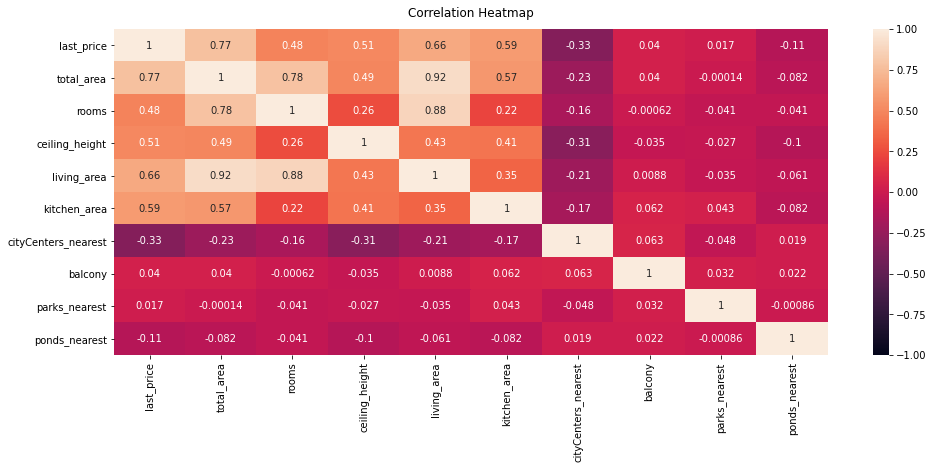

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_filtered_corr.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Тепловая карта коэффициентов корреляции позволяет нам увидеть основные факторы, влияющие на стоимость квартиры  `last_price`. Наибольшее влияние на итоговую стоимость квартиры оказывают следующие факторы (в порядке убывания силы влияния): величина общей площади, размер жилой площади, размер кухни, количество комнат, удаленность квартиры от центра. 
Наименьшее влияние на стоимость квартиры оказывают количество балконов, удаленность от парков и водоемов.


In [46]:
#df.groupby('floor_guide')['last_price'].median()

#Отразим на круговой диаграмме влияние этажа, на котором расположена квартира, на цену 
df.groupby('floor_guide')['price_per_metr'].mean()#.plot(
    #kind="pie",autopct='%.0f%%', title = 'last_price', label ='')
#plt.show()

floor_guide
Другой       101958.437342
Первый        82906.665823
Последний     90488.274979
Name: price_per_metr, dtype: float64

Как и ожидалось, квартиры первом этаже оказались самыми дешевими, чуть дороже продавцы оценивали квартиры на последнем этаже. Наиболее дорогими оказались квартиры, расположенные на этажах, отличных от первого и последнего.

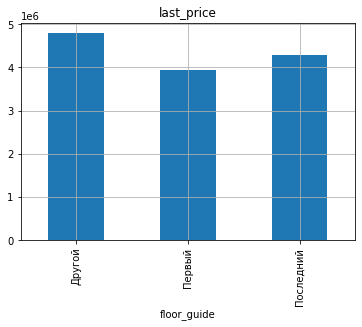

In [19]:
df.groupby('floor_guide')['last_price'].median().plot(
    kind="bar",  title = 'last_price', label ='', grid = True)
plt.show()

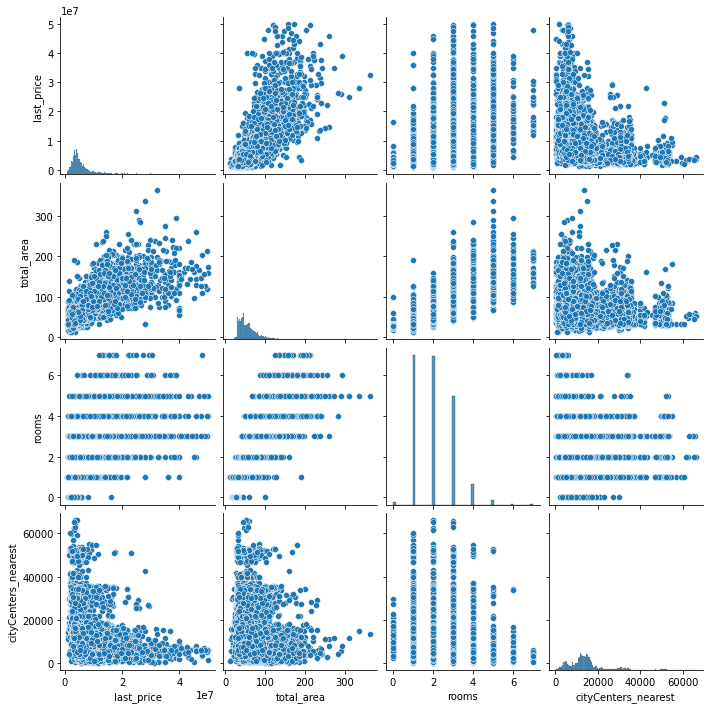

In [20]:
# Более подробно изучим влияние общей площали, количества комнат, удаленности от ценра
price_scatter = df.loc[:, ['last_price', 'total_area', 'rooms','cityCenters_nearest']]   
sns.pairplot(price_scatter, kind = 'scatter')
plt.show()

На диаграмме рассеивания хорошо видно, что основная масса квартир в опубликованных объявлениях имеет площадь до 200 квадратных метров и цену до 40 млн. рублей. Все объявления, находящиеся вне границ данной области носят более разовый характер. Так же можно сделать вывод, что на рынке практически не представлены квартиры площадью более 120 кв. метров и ценой менее 10 млн. рублей, так же как квартиры площадью менее 50 кв. метров и ценой более 20 млн. рублей. В целом по диаграмме рассеивания в паре цена/общая площадь прослеживается сильная корреляция, т.е. с увеличением общей площади пропорционально будет расти и итоговая цена.

Рассмотрим диаграмму рассеивания в паре "цена квартиры/количество комнат".
На графике хорошо прослеживается, что на рынке практически отсутствуют предложения о продаже квартир -студий ценой более 10 млн. рублей. Так же отсутствуют предложения о продаже семикомнатых квартир ценой меньше 10 млн. рублей и дороже 30 млн. руб. (за исключением одной). Стоимость однокомнатных квартир расположилась в интервале до 20 млн руб., двухкомнатных — до 40 млн. руб. Спад стоимости  объявлений о продаже четырех-, пяти-, шести-, семикомнатных квартир на графике можно связать с малым количеством объявлений в данных подгруппах объявлений. По сравнению с общей площадью квартир виден более слабый коэффициент корреляции, т.к. встречается совершенно разнообразные предложения на рынке - как и дорогие квартиры с малым количеством комнат, так и наоборот.

Рассмотрим диаграмму рассеивания в паре "цена квартиры/удаленность от центра"
В начале необходимо сделать оговорку, что столбец `cityCenters_nearest` содержит в себе пропуски значений, которые игнорируются при построении графиков, т.е. в нем не учтены ценовые предложения для которых не был заполнен данный параметр. При построении других графиков подобных ситуаций не возникало.
На этом графике хорошо видно несколько "ступеней" в ценовых предложениях: при удаленности от 0 до 10 км  встречаются максимальные ценовые предложения,  от 10 до 17 км. максимальны предложения находятся в районе 35 млн. рублей, далее следующая "ступень" понижения - на отметке 20 км. мы уже вряд ли встретим квартиры дороже 20 млн. рублей и т.д.


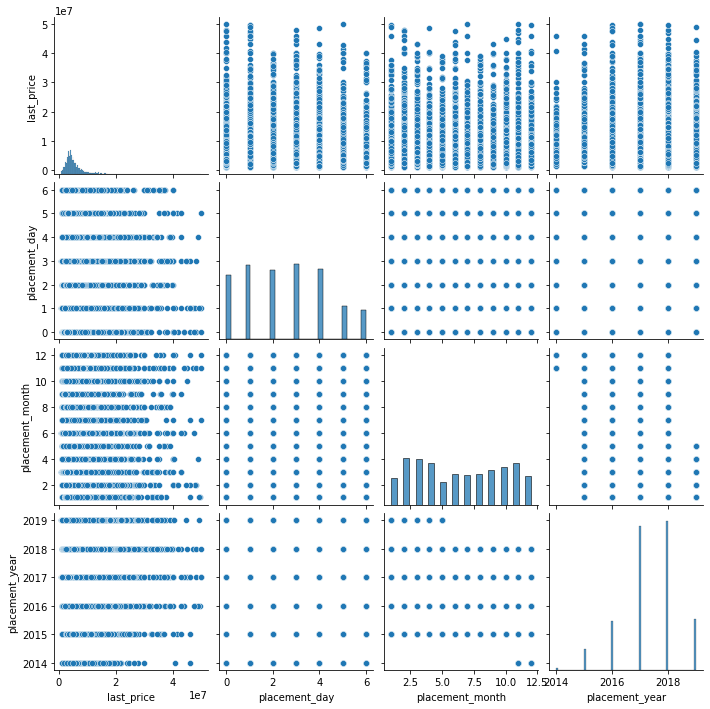

In [21]:
# Изучим влияние дня, месяца, года размещения объявления на цену квартиры
time_scatter = df.loc[:, ['last_price', 'placement_day', 'placement_month', 'placement_year']]   
sns.pairplot(time_scatter, kind = 'scatter')
plt.show()

Рассуждая о зависимости стоимости квартиры в объявлении и дня недели (и месяца) первоначально хотелось сказать что явной зависимости цены от дня публикации объявлений быть не должно.

Однако практика показала, что все же можно отметить несколько особенностей. В среду, пятницу, субботу, воскресение практически не публиковались объявления о продаже квартир дороже 40 млн. рублей (удивительно хД)

Ситуация с зависимостью цены от месяца публикации объявления еще менее явная  — за исключением локальных "просадок" и "выбросов", график максимальной цены обладает отрицательной динамикой на отрезке январь — апрель, далее идет период стагнации цен с мая по август, после чего в сентябре опять начинается рост максимальных цен объявлений.

По зависимости цен от года публикации объявлений можно сделать вывод, что с каждым годом предельная цена объявлений росла от года к году. К примеру если в 2014 году максимальная средняя цена (т.е. без учета отдельных "пиковых" объявлений) не превышала 30 млн. рублей, то в следующим году она уже шагнула к отметке 40 млн. рублей


Для отражения активности публикации объявлений построим простой график подсчета для одной категориальной переменной

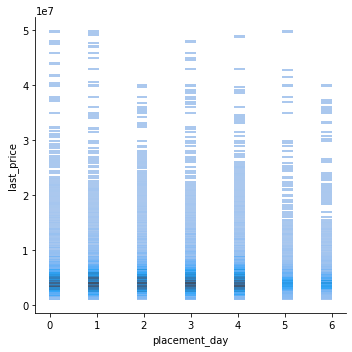

In [22]:
sns.displot(data= df, x = df['placement_day'], y = 'last_price' )

<AxesSubplot:title={'center':'placement_day'}, xlabel='placement_day'>

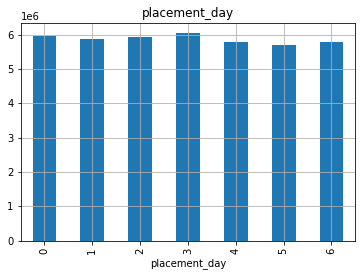

In [23]:
df.groupby('placement_day')['last_price'].mean().plot(
    kind="bar",  title = 'placement_day', label ='', grid = True)


<AxesSubplot:title={'center':'placement_month'}, xlabel='placement_month'>

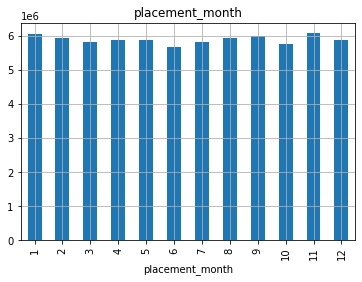

In [24]:
df.groupby('placement_month')['last_price'].mean().plot(
    kind="bar",  title = 'placement_month', label ='', grid = True)


<AxesSubplot:title={'center':'placement_year'}, xlabel='placement_year'>

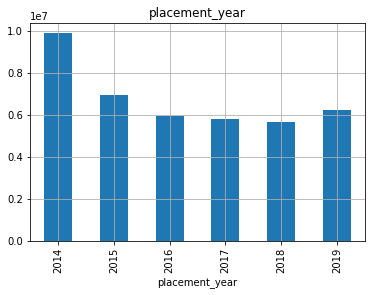

In [25]:
df.groupby('placement_year')['last_price'].mean().plot(kind="bar",  title = 'placement_year', label ='', grid = True)

<AxesSubplot:xlabel='placement_day', ylabel='count'>

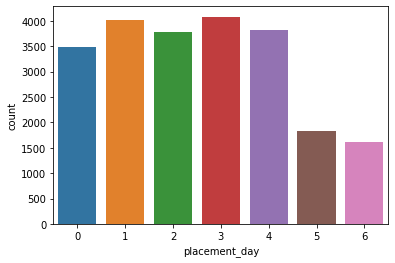

In [26]:
sns.countplot(df['placement_day'])

Люди значительно меньше публикуют объявления по субботам и воскресениям

<AxesSubplot:xlabel='placement_month', ylabel='count'>

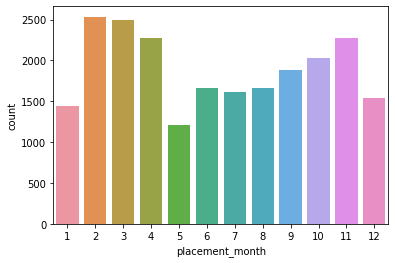

In [27]:
sns.countplot(df['placement_month'])

Минимальное количество опубликованных объявлений приходится на январь, май и декабрь. В целом график имеет 2 пика в публикации объявлений: с февраля по апрель, когда публикуется ежемесячно публиковалось большое количество объявлений, а так же плавный рост количества объявлений с августа по ноябрь.

<AxesSubplot:xlabel='placement_year', ylabel='count'>

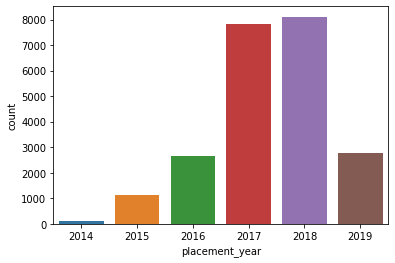

In [28]:
sns.countplot(df['placement_year'])

Минимальное количество объявлений было опубликовано в 2014 году, но с каждым годом сервис набирал популярность. Ну а малое количество публикаций в 2019 году можно объяснить тем, что датасет был сформирован судя по датам в мае 2019 года, т.е. данные за 2019 год не являются окончательными.

### Анализ 10 населённых пунктов с наибольшим числом объявлений

,price_per_metr
locality_name,
Выборг,58859.648574
Всеволожск,67416.465134
Гатчина,68955.990232
Колпино,75324.766764
посёлок Шушары,78541.065169
посёлок Мурино,85776.685302
посёлок Парголово,90268.029131
деревня Кудрово,92209.421858
Пушкин,102930.721516


<AxesSubplot:xlabel='locality_name'>

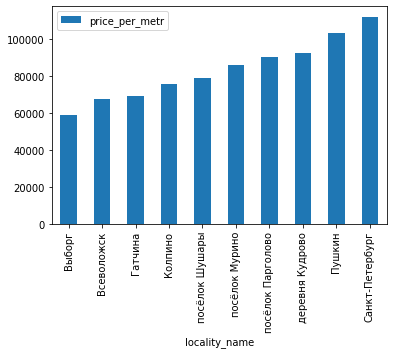

In [29]:
# Делаем выборку 10 населённых пунктов с наибольшим числом объявлений и считаем по ним цену квардратного метра
top_10_ads = df['locality_name'].value_counts().head(10).index
top_10_ads

price_per_metr_in_top_10_citys = df.query('locality_name in @top_10_ads').pivot_table (index = 'locality_name', values = 'price_per_metr' , aggfunc = 'mean').sort_values(by='price_per_metr')
display (price_per_metr_in_top_10_citys)
price_per_metr_in_top_10_citys.plot(kind = 'bar')

In [30]:
top_10_adss = df['locality_name'].value_counts()
top_10_adss

Санкт-Петербург                    15091
посёлок Мурино                       469
посёлок Шушары                       435
Всеволожск                           387
Пушкин                               363
                                   ...  
поселок Оредеж                         1
поселок Севастьяново                   1
деревня Терпилицы                      1
посёлок Платформа 69-й километр        1
деревня Куровицы                       1
Name: locality_name, Length: 330, dtype: int64

**Вывод:** Гатчина и Всеволожск не сильно отличаются по средней цене за квадратный метр, поселок Шушары от Колпино, ну а Кудрово незначительно дороже Парглово. Максимальная цена за квадратный метр зафиксирована в Санкт-Петербурге, чуть дешевле - город Пушкин.

Какой вывод можно сделать из данной гистограммы? Санкт-Питербург это вам не Выборг =) тут цена за квадрат в среднем в 2 раза выше.

### Изучение предложения квартир в зависимости от расстояния до центра

<AxesSubplot:xlabel='cityCenters_nearest'>

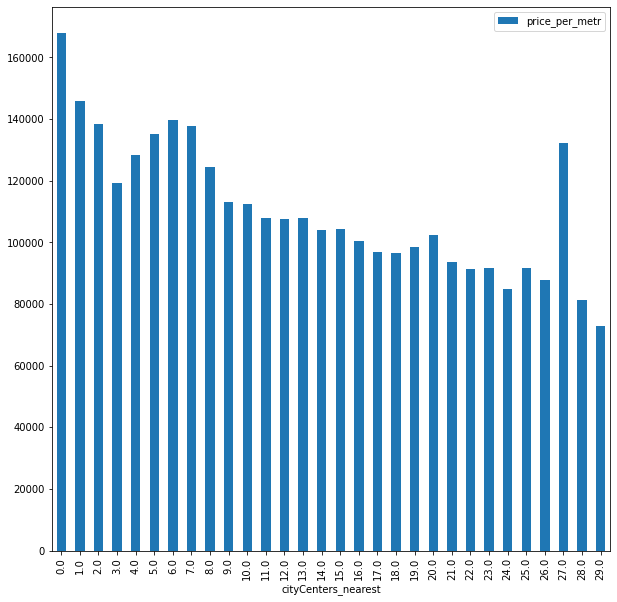

In [31]:
# Фильтруем датасет, пересчитываем расстояние из метров в километры и округляем полученное значение. 
# Далее делаем сводную таблицу по результатам полученных вычеслений и изображаем ее данные в виде гистограммы
spb_df = df.query ('locality_name == "Санкт-Петербург"')
spb_df['cityCenters_nearest'] = spb_df['cityCenters_nearest']/1000
spb_df['cityCenters_nearest'] = spb_df['cityCenters_nearest'].round(0)
spb_df_pivot = spb_df.pivot_table(index='cityCenters_nearest', values='price_per_metr', aggfunc='mean')
spb_df_pivot.plot(kind='bar',figsize= (10,10))

In [32]:
# Рассмотрим чуть внимательнией выброс данных в районе 27 км.
spb_df[spb_df['cityCenters_nearest']  == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,placement_day,placement_month,placement_year,floor_guide,living_ratio,kitchen_area_ratio
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0.0,NaN,128.0,193918.918919,1,11,2017,Другой,0.405405,0.337838
5961,6,2250000,32.0,2018-02-27,1,2.55,2,16.5,2,False,...,0.0,NaN,178.0,70312.500000,1,2,2018,Последний,0.515625,0.218750


Сильный перекос дает объявление с индексом 748, я думаю им можно пренебречь.

Рассмотрев гистограмму выше, можно прийти к выводу, что сильная динамика снижения цены за квадратный метр начинается с 8-го киллометра. Это расстояние и возьмем в качестве отправного при определении центральной зоны.

### Анализ сегмента квартир в центре

In [33]:
# Создадим новый датасет и передадим в него все строки с объявлениями, расположенными в радиусе 8 км от центра
spb_df_centers = spb_df.query('cityCenters_nearest < = 8')
#print(spb_df_centers.shape) # Сосчитаем, сколько у нас получилось объявлений в отфильтрованном датасете.

#Напишем функцию сортировки, с помощью которой присвоим объявлению статус расположения в центре/прочие объявления
spb_centers_index = spb_df_centers.index
df['index'] = df.index
spb_df['index'] = spb_df.index # Вариант для последующего анализа центральной зоны СПБ с остальным СПБ

def func (row):
    if row['index'] in spb_centers_index:
        return 'Центр'
    else:
        return 'Остальные'

df['sorting_by_distance'] = df.apply(func, axis =1)
spb_df['sorting_by_distance'] = spb_df.apply(func, axis =1)# Вариант для последующего анализа центральной зоны СПБ с остальным СПБ

df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_metr,placement_day,placement_month,placement_year,floor_guide,living_ratio,kitchen_area_ratio,index,sorting_by_distance
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481,0,Остальные
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277,1,Остальные
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,558.0,92785.714286,3,8,2015,Другой,0.612500,0.148214,2,Остальные
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000,4,Центр
5,10,2890000,30.4,2018-09-10,1,2.52,12,14.4,5,False,...,55.0,95065.789474,0,9,2018,Другой,0.473684,0.299342,5,Остальные


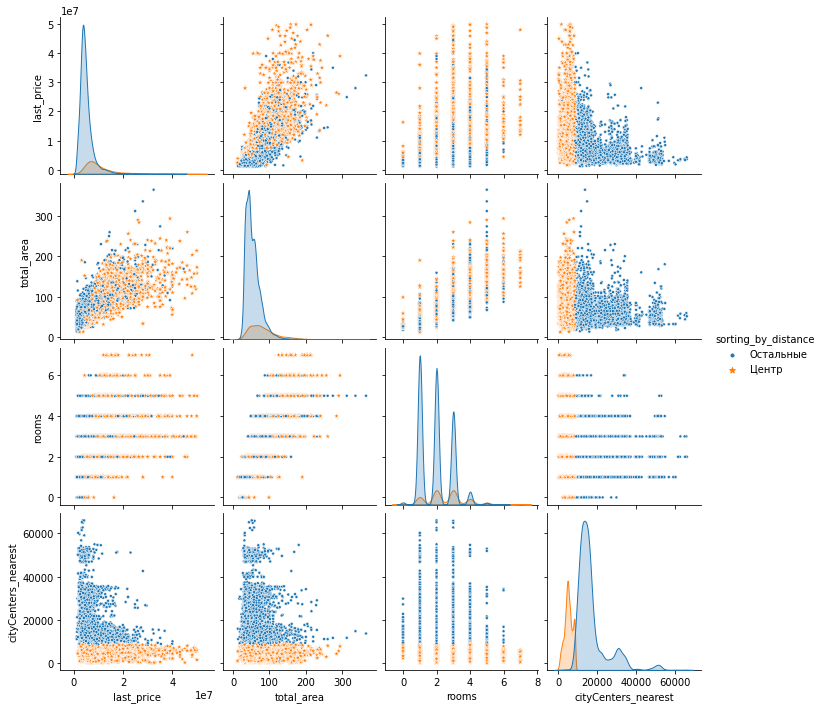

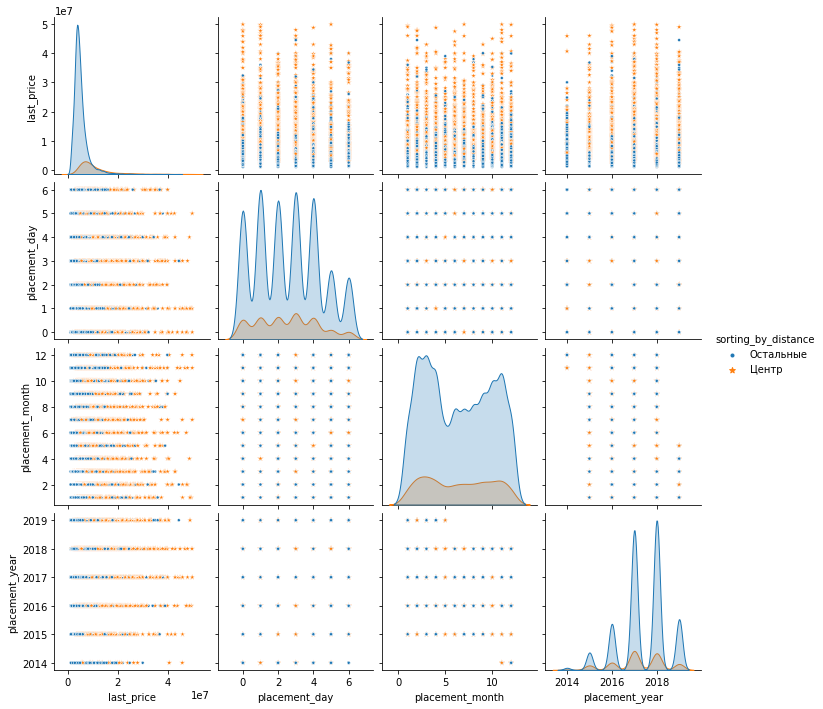

In [34]:
price_center_scatter = df.loc[:, ['last_price', 'total_area', 'rooms','cityCenters_nearest','sorting_by_distance']]   
sns.pairplot(price_center_scatter, kind="scatter", hue = 'sorting_by_distance', markers=[".", "*"])
plt.show()

time_center_scatter = df.loc[:, ['last_price', 'placement_day', 'placement_month', 'placement_year', 'sorting_by_distance']]   
sns.pairplot(time_center_scatter, kind="scatter",hue = 'sorting_by_distance', markers=[".", "*"])
plt.show()

Видим, что графики в каждой паре значений практически во всех отношениях повторяют друг друга, однако присутствуют и отличия.  

Медианные значения цены квартиры по общей выборки ниже по сравнению с квартирами в центре, что говорит нам, что средние цены на квартиры в центре выше.  Так же можно отметить, что в выборке квартир в центре  в процентном соотношении присутствуют чуть больше квартир с площадью от 120 до 200 кв.м.

In [35]:
spb_df_centers.describe() #немного описательной статистики

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,placement_day,placement_month,placement_year,living_ratio,kitchen_area_ratio
count,3763.000000,3.763000e+03,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,...,2452.000000,3763.000000,2671.000000,3162.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000
mean,10.014616,1.072543e+07,80.305227,2.593675,2.948047,7.687749,46.714822,4.435557,13.146988,0.348126,...,473.361746,1.256444,472.789592,237.028779,132816.907580,2.513420,6.389583,2017.205155,0.575095,0.176351
std,5.972652,7.174119e+06,37.050600,1.158347,0.334089,4.420907,24.279002,3.273755,7.199356,0.792031,...,309.770161,1.072533,265.186218,268.010452,53604.626654,1.727908,3.446441,1.114118,0.111769,0.082981
min,0.000000,1.600000e+06,12.000000,0.000000,2.400000,2.000000,2.000000,1.000000,0.000000,0.000000,...,9.000000,0.000000,22.000000,3.000000,16842.105263,0.000000,1.000000,2014.000000,0.038462,0.000000
25%,5.000000,6.300000e+06,53.000000,2.000000,2.700000,5.000000,30.000000,2.000000,8.700000,0.000000,...,290.000000,0.000000,247.000000,59.000000,99930.620210,1.000000,3.000000,2017.000000,0.510495,0.121622
50%,10.000000,8.500000e+06,73.000000,3.000000,2.900000,6.000000,42.480000,4.000000,11.200000,0.000000,...,441.000000,1.000000,454.000000,132.000000,122077.922078,3.000000,6.000000,2017.000000,0.587950,0.154605
75%,14.000000,1.259345e+07,98.000000,3.000000,3.110000,9.000000,58.900000,5.000000,15.100000,0.000000,...,595.000000,2.000000,671.000000,325.000000,149562.444189,4.000000,9.000000,2018.000000,0.655172,0.209197
max,50.000000,4.990000e+07,293.600000,7.000000,4.800000,28.000000,149.400000,25.000000,58.400000,5.000000,...,2295.000000,3.000000,1293.000000,1512.000000,848484.848485,6.000000,12.000000,2019.000000,0.983447,0.942308


In [36]:
#посмотрим коррекляцию внутри выборки
spb_filtered_corr = spb_df_centers[['last_price','total_area', 'rooms', 'ceiling_height', 'living_area', 'kitchen_area', 
          'cityCenters_nearest', 'balcony', 'parks_nearest', 'ponds_nearest']]
spb_filtered_corr.corr()

,last_price,total_area,rooms,ceiling_height,living_area,kitchen_area,cityCenters_nearest,balcony,parks_nearest,ponds_nearest
last_price,1.000000,0.724695,0.436138,0.294698,0.599109,0.527979,-0.085495,0.121690,-0.021920,-0.070313
total_area,0.724695,1.000000,0.784793,0.399571,0.911431,0.507566,-0.156569,0.019753,-0.036465,-0.049245
rooms,0.436138,0.784793,1.000000,0.327864,0.860154,0.215578,-0.203724,-0.090025,-0.078180,-0.036254
ceiling_height,0.294698,0.399571,0.327864,1.000000,0.405843,0.209832,-0.289888,-0.093054,-0.069522,-0.040787
living_area,0.599109,0.911431,0.860154,0.405843,1.000000,0.276801,-0.191226,-0.044605,-0.067011,-0.031470
kitchen_area,0.527979,0.507566,0.215578,0.209832,0.276801,1.000000,-0.073514,0.085823,0.025361,-0.042400
cityCenters_nearest,-0.085495,-0.156569,-0.203724,-0.289888,-0.191226,-0.073514,1.000000,0.173826,0.064416,0.213372
balcony,0.121690,0.019753,-0.090025,-0.093054,-0.044605,0.085823,0.173826,1.000000,0.111120,0.012984
parks_nearest,-0.021920,-0.036465,-0.078180,-0.069522,-0.067011,0.025361,0.064416,0.111120,1.000000,0.085211
ponds_nearest,-0.070313,-0.049245,-0.036254,-0.040787,-0.031470,-0.042400,0.213372,0.012984,0.085211,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

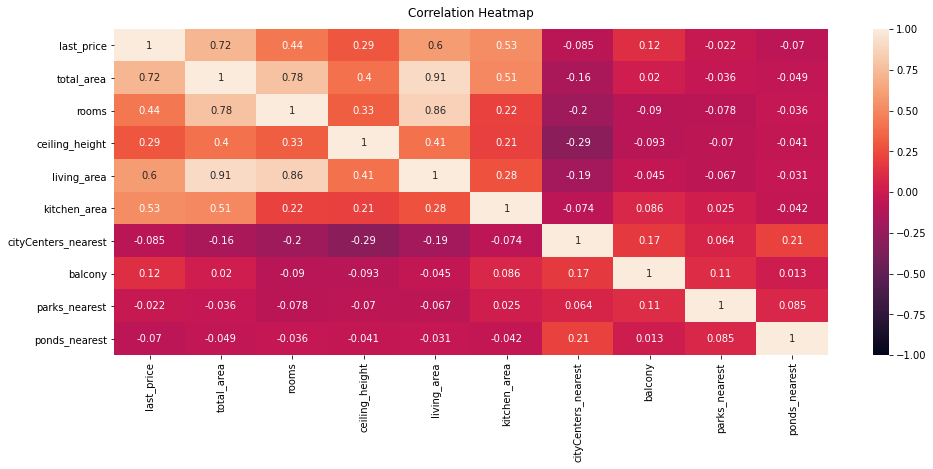

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(spb_filtered_corr.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Удивили данные о коэффициентах корреляции внутри выборки квартир в центре. Значения корреляции цены и общей площади, количества комнат, жилой площади, площади кухни снизились, но не значительно — снижение коэффициентов на 0,04-0,05. 

В то же время значения корреляции цены квартиры и высоты потолков, а так же от удаленности квартиры от центра значительно ослабели свое влияние.  Удаленность от центра практически полностью перестала влиять на итоговую цену. Это говорит нам, что если квартира уже относится к центральному району, то не важно насколько далеко она будет находиться от нулевого километра. На ее конечную цену будут более влиять другие факторы, например количество балконов, влияния которых было в 3 раза ниже в общей выборки (коэффициент корреляции 0,12 против 0,04 в общей выборке)

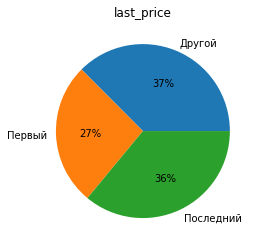

In [38]:
# Рассмотрим на круговой диаграмме влияние этажа, на котором расположена квартира, на цену для выборки квартир из центра
spb_df_centers.groupby('floor_guide')['last_price'].median().plot(
    kind="pie",autopct='%.0f%%', title = 'last_price', label ='')
plt.show()

Так же как и в случае общей выборки, самыми дешевыми предложениями оказались объявления о продаже квартир, расположенных на 
первом этаже. А вот стоимость последних и прочих этажей практически сравнялась.


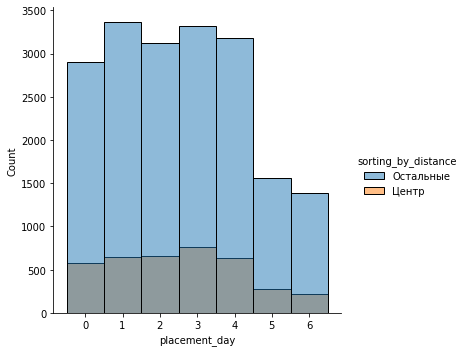

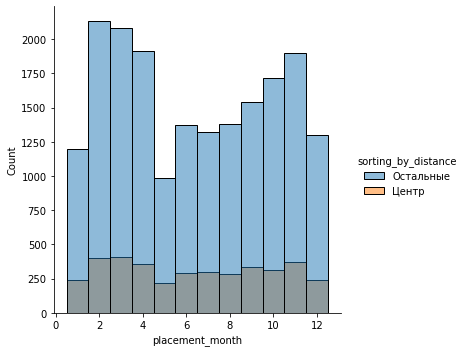

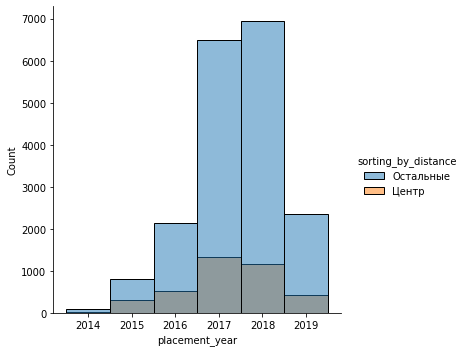

In [39]:
sns.displot(data=df, x='placement_day', hue="sorting_by_distance", stat="count", discrete=True)

sns.displot(data=df, x='placement_month', hue="sorting_by_distance", stat="count", discrete=True)

sns.displot(data=df, x='placement_year', hue="sorting_by_distance", stat="count", discrete=True)



Анализ по дням недели, месяцу и году показывает, что число объявлений, замещенных о продаже квартир в центре, менее подвержено влиянию времени и более стабильно (по отношению к остальной выборке). Но все равно прослеживается общая динамика роста и снижения числа объявлений.

<AxesSubplot:title={'center':'placement_day'}, xlabel='placement_day'>

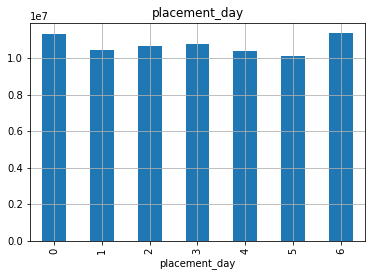

In [40]:
spb_df_centers.groupby('placement_day')['last_price'].mean().plot(
    kind="bar",  title = 'placement_day', label ='', grid = True, ylim=(0,None))


Как и ожидалось, средняя цена квартиры в центре выше по сравнению с общей выборкой, но так же мало зависит от дня недели размещения объявления. Мы видим, что средние цены находились на уровне  10-11.5 млн рублей, но такой разброс, как мне кажется, связан скорее всего c какими-то разовыми объявлениями о продаже квартир в центре, выпавшими на конкретно этот день, чем о какой о взаимосвязи между средней ценой квартиры и дня недели публикации объявлений.

<AxesSubplot:title={'center':'placement_month'}, xlabel='placement_month'>

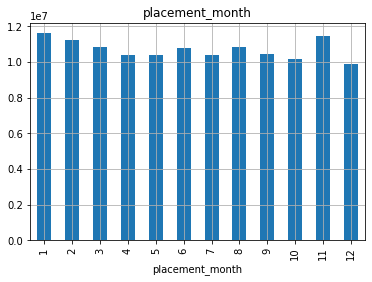

In [41]:
spb_df_centers.groupby('placement_month')['last_price'].mean().plot(
    kind="bar",  title = 'placement_month', label ='', grid = True)


На графике по месяцам так же без изменений по сравнению с диаграммой средней цены публикаций объявлений по дням недели. Мы видим все тот же разброс цен в приделах 10-11,5 млн. рублей. 

<AxesSubplot:title={'center':'placement_month'}, xlabel='placement_year'>

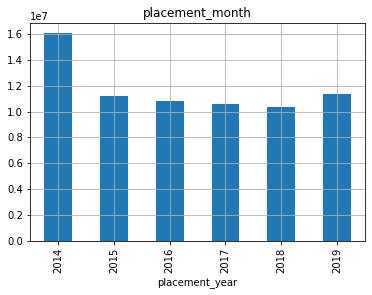

In [42]:
spb_df_centers.groupby('placement_year')['last_price'].mean().plot(
    kind="bar",  title = 'placement_month', label ='', grid = True)


 График средней цены по годам размещения объявлений очертаниями полностью повторяет график по общей совокупности объявлений, соответсвенно, можно сделать вывод, что ситация на рынке недвижимости так же сказалась на стоимость квартир в центре. В 2016 году были самые дорогие квартиры в центре, их средняя стоимость  достигала 16 млн. рублей. Средняя цена так же снижалась в 2015-2018 годах до уровня 10-11 млн. рублей и в 2019 году она подросла по отношению к 2018 году  примерно на 1 млн. рублей.

## Общий вывод

Все задачи, поставленные при проведении анализа были выполнены.

В ходе анализа было выявлено, что на рынке присутствует большой разброс цен на квартиры, обладающие одинаковыми физическими характеристиками, при этом можно сделать вывод на цену одновременно оказывает большое количество различных факторов: величина общей площади квартир, размер жилой площади, размер кухни, количество комнат, удаленность квартиры от центра.

Медианное значение времени продажи квартиры равно 96 дней, среднее значение времени продажи квартиры равно 180 дней. Исходя из описательной статистики, можно сделать предположение, что необычно быстрой продажей будет считаться продажа в первые 45 суток от публикации объявлений, а необычно долгой - в течении более 231 дня.

Наименьшее влияние на стоимость квартиры оказывают количество балконов, удаленность от парков и водоемов. Безусловно данный перечень не является окончательным и исчерпывающим, потому что в данных датафрейма не учтены еще ряд факторов — например год постройки дома, год последнего ремонта квартиры, наличие прилегающей к дому территории, близость объектов инфраструктуры и т.д.

Самыми дорогими оказались квартиры, расположенные в Санкт-Петербурге и Пушкине. 

Ожидаемо самые дешевые предложения на рынке — это квартиры, расположенные на первом этаже, чуть более дорогими — на последнем этаже. Самая высокая цена у квартир, расположенных не на первом или последнем этаже.

Анализ объявлений о продаже квартир в центре показал, что в целом объявления о продаже носят аналогичный характер с общей выборкой, однако на стоимость квартир в центре меньше влияют ее расположение относительно нулевого километра и высота потолка, зато становятся более ценными другие факторы — например количество балконов.